In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# K Near-Neighbors Classifier(KNN)

In [3]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='uniform', n_neighbors=4, metric = "manhattan")
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [5]:
y_knn_pred = knn_clf.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.7

## Distance and Kneighbors

In [7]:
knn_clf.kneighbors(X_test)

(array([[0. , 0.1, 0.1, 0.2],
        [0.3, 0.4, 0.4, 0.4],
        [0.2, 0.4, 0.5, 0.5],
        [0.1, 0.1, 0.2, 0.2],
        [0.2, 0.3, 0.3, 0.3],
        [0. , 0.2, 0.3, 0.3],
        [0.1, 0.1, 0.1, 0.1],
        [0. , 0. , 0.1, 0.2],
        [0.2, 0.2, 0.2, 0.4],
        [0. , 0. , 0. , 0.1],
        [0.1, 0.1, 0.2, 0.2],
        [0.1, 0.2, 0.2, 0.3],
        [0.2, 0.3, 0.3, 0.4],
        [0. , 0.1, 0.2, 0.2],
        [0. , 0. , 0.1, 0.3],
        [0. , 0.1, 0.2, 0.2],
        [0. , 0. , 0.1, 0.2],
        [0.1, 0.1, 0.2, 0.2],
        [0. , 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1],
        [0. , 0.1, 0.2, 0.3],
        [0. , 0.1, 0.1, 0.2],
        [0. , 0.1, 0.1, 0.1],
        [0.1, 0.1, 0.1, 0.1],
        [0.2, 0.9, 1. , 1.1],
        [0. , 0.1, 0.1, 0.1],
        [0.4, 0.4, 0.5, 0.5],
        [0.1, 0.2, 0.2, 0.2],
        [0.1, 0.2, 0.2, 0.3],
        [0.1, 0.2, 0.2, 0.2]]),
 array([[115,  79,  81,  62],
        [117,  14,  13,  48],
        [ 24,  64, 106,  21],
        

In [8]:
y_knn_pred[16]

1

In [9]:
for i, idx in enumerate(knn_clf.kneighbors(X_test)[1]):
  print(i, y_train[idx])

0 [1 1 2 1]
1 [0 0 0 0]
2 [2 2 2 2]
3 [1 2 1 2]
4 [2 1 1 1]
5 [0 0 0 0]
6 [2 1 1 1]
7 [1 2 2 1]
8 [1 1 2 1]
9 [2 1 2 2]
10 [2 1 2 2]
11 [0 0 0 0]
12 [0 0 0 0]
13 [0 0 0 0]
14 [0 0 0 0]
15 [2 2 2 2]
16 [2 2 1 1]
17 [1 2 1 1]
18 [1 2 1 2]
19 [2 1 1 2]
20 [0 0 0 0]
21 [1 2 1 1]
22 [0 0 0 0]
23 [2 1 1 2]
24 [2 2 2 2]
25 [1 2 1 2]
26 [1 2 2 1]
27 [2 2 2 2]
28 [0 0 0 0]
29 [0 0 0 0]


In [10]:
print("NN distance : ", knn_clf.kneighbors(X_test)[0][16])
print("NN index : ", knn_clf.kneighbors(X_test)[1][16])
print("vote : ",y_train[knn_clf.kneighbors(X_test)[1][16]])
print("pred : ",y_knn_pred[16])
print("gt : ",y_train[16])

NN distance :  [0.  0.  0.1 0.2]
NN index :  [ 87 109  18  92]
vote :  [2 2 1 1]
pred :  1
gt :  2


In [11]:
print(f"X1: {X_train[:, 0].min()} ~ {X_train[:, 0].max()}")
print(f"X2: {X_train[:, 1].min()} ~ {X_train[:, 1].max()}")

X1: 4.3 ~ 7.7
X2: 2.0 ~ 4.4


In [13]:
def vis_db(clf, X, y , axes = [4, 8, 1.5, 4.5]):
  x1s = np.linspace(axes[0], axes[1], 100)
  x2s = np.linspace(axes[2], axes[3], 100)
  x1, x2 = np.meshgrid(x1s, x2s)
  X_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(X_new).reshape(x1.shape)
  custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
  plt.figure(figsize=(10,8))
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
  sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y)

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

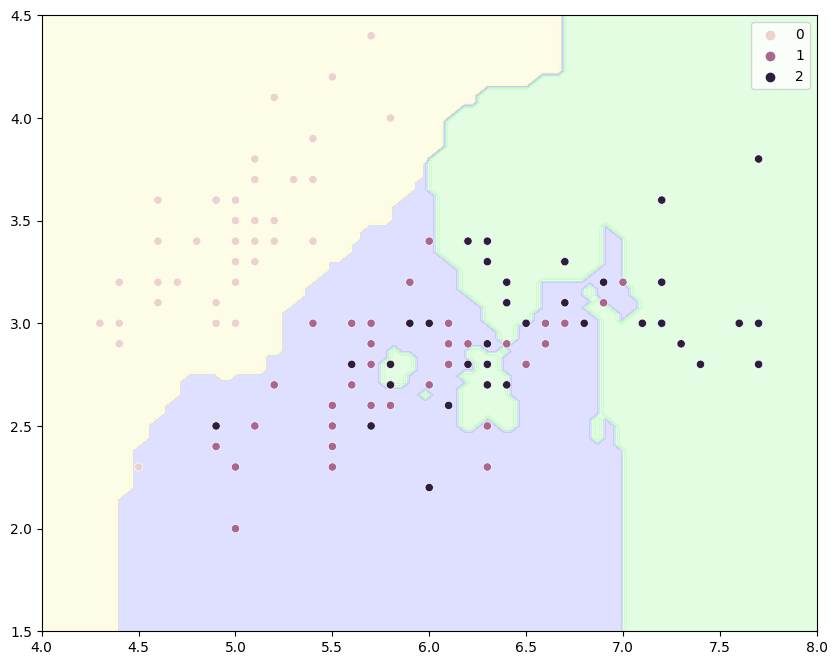

In [14]:
vis_db(knn_clf, X_train, y_train)

In [ ]:
knn_clf_wight_euclidean = KNeighborsClassifier(weights='distance', metric ="euclidean",n_neighbors=1)
knn_clf_wight_euclidean.fit(X_train, y_train)
vis_db(knn_clf_wight_euclidean, X_train, y_train)

## Finding optimal K

In [21]:
acc = []
for k in range(1, 100):
  knn_clf = KNeighborsClassifier(weights='uniform', n_neighbors= k)
  knn_clf.fit(X_train, y_train)
  acc.append(knn_clf.score(X_test, y_test))

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x = range(1,100), y = acc)

# Cross validation

In [33]:
from sklearn.model_selection import cross_val_score
knn_clf = KNeighborsClassifier(weights='uniform', n_neighbors=5, metric = "manhattan")
knn_cv = cross_val_score(knn_clf, X_train, y_train, cv=10)

In [ ]:
for f, s in enumerate(knn_cv):
  print(f"{f} fold : {s}")
print(f"mean : {knn_cv.mean()}")

In [ ]:
plt.figure(figsize = ( 10, 5))
sns.boxplot(x = knn_cv, orient = "Vertical")
plt.xlabel("acc", fontsize = 20)
plt.xticks(fontsize = 15)

In [44]:
acc = []
for k in range(1, 50):
  knn_clf = KNeighborsClassifier(weights='uniform', n_neighbors= k)
  score = cross_val_score(knn_clf, X_train, y_train, cv=5)
  acc.append(score.mean())

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x = range(1,50), y = acc)
plt.xlabel("k",fontsize = 20)
plt.ylabel("acc", fontsize = 20)

In [ ]:
np.argsort(acc)[::-1]

# Scaler Pipe Line

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
std_scaler = StandardScaler()
std_scaler.fit(X)
x_scaled = std_scaler.transform(X)

In [ ]:
sns.distplot(X[:,0])

In [ ]:
sns.distplot(x_scaled[:,0])

In [105]:
acc_scaled = []
for k in range(1, 100):

  std_scaler = StandardScaler()
  knn = KNeighborsClassifier(weights='uniform', n_neighbors=k)
  Knn_pipe = Pipeline([
          ("std_scaler", std_scaler),
          ("knn", knn),
      ])

  score_scaled = cross_val_score(Knn_pipe, X_train, y_train, cv=10)
  acc_scaled.append(score_scaled.mean())

Text(0, 0.5, 'acc')

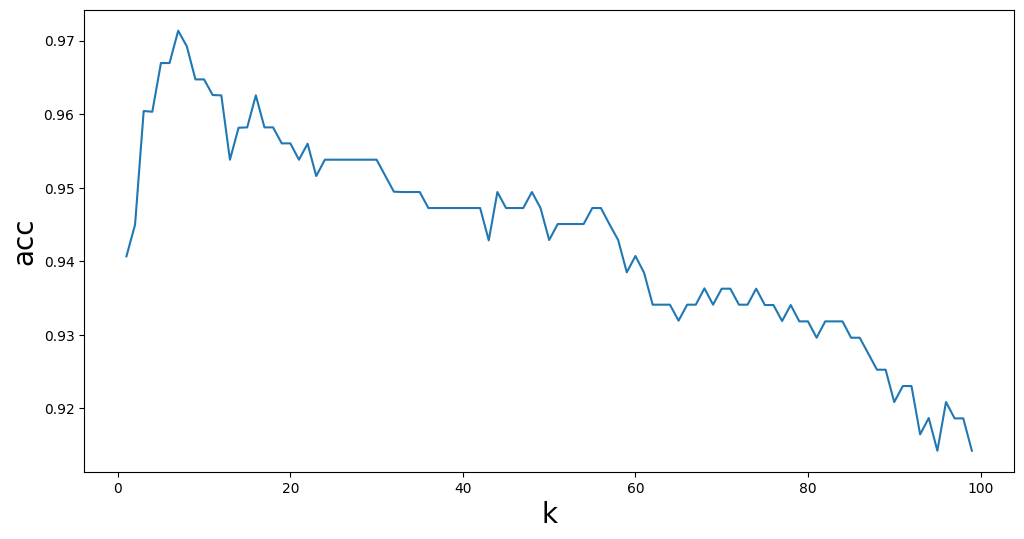

In [106]:
plt.figure(figsize=(12,6))
sns.lineplot(x = range(1,100), y = acc_scaled)
plt.xlabel("k",fontsize = 20)
plt.ylabel("acc", fontsize = 20)

# breast cancer data

In [88]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)

In [ ]:
data.data.head()

In [ ]:
data.data.columns

In [ ]:
data.data.describe()

In [94]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size= 0.2, random_state = 42)

In [95]:
std_scaler = StandardScaler()
knn = KNeighborsClassifier(weights='uniform', n_neighbors=20)

In [ ]:
knn_cv = cross_val_score(knn, data.data, data.target, cv=10)
knn_cv.mean()

In [97]:
acc = []
for k in range(1, 100):
  knn = KNeighborsClassifier(weights='uniform', n_neighbors=k)
  score = cross_val_score(knn, X_train, y_train, cv=10)
  acc.append(score.mean())

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x = range(1,100), y = acc)
plt.xlabel("k",fontsize = 20)
plt.ylabel("acc", fontsize = 20)

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
acc_scaled = []
models = []
for k in range(1, 100):
  knn = KNeighborsClassifier(weights='uniform', n_neighbors=k)
  Knn_pipe = Pipeline([
          ("std_scaler", std_scaler),
          ("knn", knn),
      ])

  score = cross_val_score(Knn_pipe,  X_train, y_train, cv=10)
  models.append(Knn_pipe)
  acc_scaled.append(score.mean())

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x = range(1,100), y = acc, label = "no scaled")
sns.lineplot(x = range(1,100), y = acc_scaled, label = "std scaled")
plt.title("scaled vs no scaled", fontsize = 30)
plt.xlabel("k",fontsize = 20)
plt.ylabel("acc", fontsize = 20)

In [101]:
best_k = np.argmax(np.array(acc_scaled))

In [ ]:
print(f"best K : {best_k}")

In [ ]:
models[best_k].fit(X_train,y_train)

In [ ]:
#@title
models[best_k].score(X_test,y_test)